In [1]:
from Genome.goldstandard_pair.lls import *
gd = '/home/hermuba/data0118/goldstandard/tf_intersectGO.smpl'
net = '/home/hermuba/data0118/map_to_exist_net/string' #ID has problem

In [2]:
gold = read_gold(gd)
all_chunks = read_net_by_chunk(net)
all_chunk = merge_net_with_all_chunks(gold,all_chunks)

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


In [3]:
all_chunk.head()

,combined_score,gene_one,gene_two,goldstandard
0,215,562.22522.con.0003_166|562.22522,JMUY01000001_1580|1438670.3,0
1,453,562.22567.con.0005_6|562.22567,JMUY01000004_236|1438670.3,0
2,203,562.23168.con.0001_338|562.23168,FLWH01000001_555|562.12962,0
3,167,562.23168.con.0001_338|562.23168,JMUY01000002_107|1438670.3,0
4,433,562.23184.con.0019_75|562.23184,JMUY01000004_370|1438670.3,0


In [4]:
all_chunk.shape

(1536, 4)

In [5]:
all_chunk.to_csv('~/data0118/string_GO_smpl')

In [6]:
%matplotlib inline
def wrap_for_diff_score(score, all_chunk):
    lls_score = lls_for_other(all_chunk, score)
    true_thres, slope, intercept = lls_regress_thres(lls_score)
    new_lls = map_lls(lls_score, true_thres, slope, intercept)
    all_chunk = map_score_to_lls(all_chunk, new_lls, score)
    tradeoff = try_diff_lls_thres(all_chunk)
    return(new_lls, all_chunk,lls_score, tradeoff, true_thres)

In [7]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score('combined_score', all_chunk)

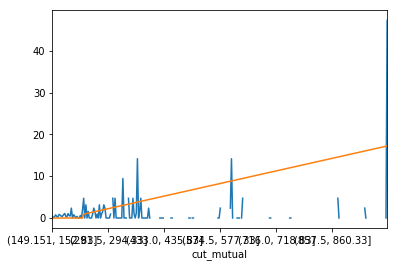

In [8]:
lls_score.plot()
new_lls.plot()

Text(0, 0.5, 'PPV')

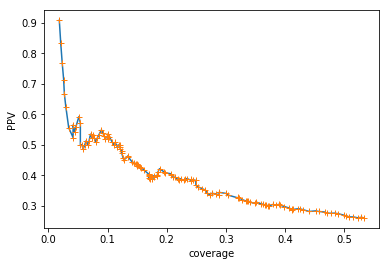

In [9]:
import matplotlib.pyplot as plt
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '-')
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '+')
plt.xlabel('coverage')
plt.ylabel('PPV')

In [11]:
tradeoff.to_csv('~/data0118/PPV_coverage/string_300')

In [14]:
output = '/home/hermuba/data0118/network1122/string_edgelist'
map_lls_to_whole_data(net, new_lls, 'combined_score', true_thres, output)

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  all_df['lls'] = all_df[score].map(new_lls)


done with chunk 0
done with chunk 1
done with chunk 2
done with chunk 3
done with chunk 4
done with chunk 5
done with chunk 6
done with chunk 7
done with chunk 8
done with chunk 9
done with chunk 10
done with chunk 11
